In [1]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


Загрузим исходное изображение и покажем его:

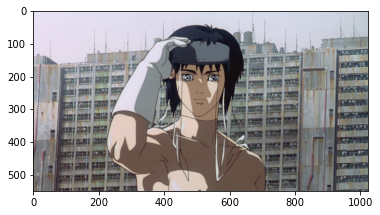

In [2]:
img = image.load_img("input_image.jpg")
plt.imshow(img)

Преобразуем исходное изображение в матрицу с разменостью (x, y, 3):

In [3]:
image_matrix = image.img_to_array(img)

В первую очередь находим размерность матрицы изображения(num_rows, num_cols), далее составляем матрицу для афинных преобразований. Поскольку мы перемещаем изображение лишь по оси х и у, то угол альфа равен 90'. Поэтому матрица(translation_matrix) и выглядит именно так :) Далее применяем замечательную и оптимизированную функцию(cv2.warpAffine), которая всё просчитает и порежет в нужный размер за нас)

In [4]:
def image_bias(matrix, x_bias, y_bias):
    num_rows, num_cols = matrix.shape[:2]
    translation_matrix = np.float32([[1, 0, x_bias], [0, 1, y_bias]])
    img_translation = cv2.warpAffine(matrix, translation_matrix, (num_cols, num_rows))
    return img_translation

Применим вышеописанную функцию:

In [5]:
output_img_matrix = image_bias(image_matrix, 400, 200)

Преобразуем полученную матрицу в изображение и покажем её:

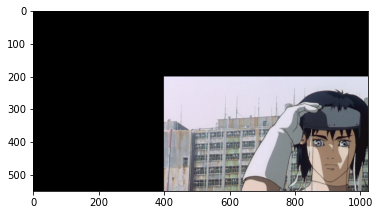

In [6]:
output_image = image.array_to_img(output_img_matrix)
plt.imshow(output_image)

Сохраним полученное изображение:

In [7]:
output_image.save("bias_augmentation_output.jpg")